## Comparing Model Performance Of Different Body Placements
### Results:
With Decision Tree (60 trees):  
- Belt_Dataset ---> Train ---> Model <--- Test <--- Wrist Dataset: accuracy of 21%  
- Belt_Dataset ---> Train ---> Model <--- Test <--- Belt Dataset: accuracy of 46%


## Analysis of Available Datasets

- Realistic sensor displacement benchmark dataset-2014:RSD
    - Nr of Labels: 33
    - Nr of Columns: 120
    - Header: Ts(seconds); Ts(microseconds); ( ACC_X;ACC_Y;ACC_Z;GYR_X;GYR_Y;GYR_Z;MAG_X;MAG_Y;MAG_Z;QUAT_1;QUAT_2;QUAT_3;QUAT_4; ) * 9 BodyPositions ; Label
- PAMAP2-2012:PMAP
    - Nr of Labels: 
    - Nr of Columns: 
    - Header: 
    

In [176]:
# Reference: https://www.kaggle.com/xpuspus/ml-dl-human-activity-recognition

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Any results you write to the current directory are saved as output.

Load Dependencies

In [177]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [178]:
import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix as cf
from keras.utils.np_utils import to_categorical
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.utils import vis_utils
from keras.utils import plot_model
from sklearn.ensemble import RandomForestClassifier as RF
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix as cf
# from keras.utils.np_utils import to_categorical
from sklearn.decomposition import PCA
from sklearn.preprocessing import label_binarize
#from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score as cv_score
import time
from sklearn.metrics import roc_curve as roc
from sklearn.metrics import auc as auc

Load Training and Test Set

In [248]:
train_data = pd.read_csv('../pre-processing/valid-dataset/Participant_1_belt.csv')
train_data.append(pd.read_csv('../pre-processing/valid-dataset/Participant_2_belt.csv'))
train_data.append(pd.read_csv('../pre-processing/valid-dataset/Participant_3_belt.csv'))
train_data.append(pd.read_csv('../pre-processing/valid-dataset/Participant_4_belt.csv'))
train_data.append(pd.read_csv('../pre-processing/valid-dataset/Participant_5_belt.csv'))
train_data.append(pd.read_csv('../pre-processing/valid-dataset/Participant_6_belt.csv'))
train_data.append(pd.read_csv('../pre-processing/valid-dataset/Participant_7_belt.csv'))
train_data.append(pd.read_csv('../pre-processing/valid-dataset/Participant_8_belt.csv'))
train_data.append(pd.read_csv('../pre-processing/valid-dataset/Participant_9_belt.csv'))

,ax,ay,az,lx,ly,lz,gx,gy,gz,mx,my,mz,label
0,5.1213,-2.19290,-0.708260,-4.53520,-0.676290,0.081656,0.436160,0.163710,0.198230,-21.90,7.14,5.34,walking
1,5.6116,-2.12480,-1.266700,-4.04080,-0.559740,-0.523690,0.322840,0.431270,0.211970,-21.60,7.50,5.64,walking
2,6.0611,-1.47100,-2.478900,-3.59080,0.157950,-1.880200,0.204030,0.728460,0.164930,-21.12,8.40,6.12,walking
3,7.7091,-0.77636,-3.541300,-1.94500,0.857960,-2.995300,0.098960,0.943790,0.064752,-20.94,8.70,6.30,walking
4,11.2100,-0.98067,-1.675300,1.54300,0.635280,-1.334200,0.183260,0.812150,-0.033292,-20.70,9.30,6.42,walking
5,12.6120,-1.51190,0.980670,2.94000,0.083211,1.244200,0.588570,0.520460,-0.251370,-20.64,9.66,6.30,walking
6,15.8540,-5.85670,2.233700,5.12710,-2.534300,3.376300,0.646600,0.351250,-0.259920,-20.70,10.02,6.18,walking
7,17.2430,-4.60370,-10.120000,7.57480,-2.971000,-9.964100,0.048869,0.315510,0.356130,-20.76,10.62,5.82,walking
8,17.0250,-2.51980,-10.815000,7.36530,-0.864190,-10.480000,-0.409890,0.004887,0.536650,-20.88,10.92,5.76,walking
9,13.2250,1.19860,-3.568500,3.57760,2.893500,-3.101200,-1.141100,-1.471600,0.151190,-21.00,11.16,5.76,walking


# Training Model With Decision Tree

In [249]:
X_train = train_data.drop('label', axis = 1)
X_train.head(2)

,ax,ay,az,lx,ly,lz,gx,gy,gz,mx,my,mz
0,5.1213,-2.1929,-0.70826,-4.5352,-0.67629,0.081656,0.43616,0.16371,0.19823,-21.9,7.14,5.34
1,5.6116,-2.1248,-1.26670,-4.0408,-0.55974,-0.523690,0.32284,0.43127,0.21197,-21.6,7.50,5.64


In [250]:
y_train = pd.get_dummies(train_data.label)
y_train.head(1)

,biking,downstairs,jogging,sitting,standing,upstairs,walking
0,0,0,0,0,0,0,1


In [251]:
rf = RF(60)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=60, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

# Testing With Signals Of a Different Body Placement

In [252]:
test_data = pd.read_csv('../pre-processing/valid-dataset/Participant_10_wrist.csv')

In [253]:
## Randomly Select 
df = pd.DataFrame(test_data)
# Randomly sample 70% of your dataframe
test_data= df.sample(frac=0.1)

In [254]:
X_test = test_data.drop('label', axis = 1)
y_test = pd.get_dummies(test_data.label)

In [255]:
y_pred = rf.predict(X_test)

In [256]:
cf(np.argmax(y_test.as_matrix(), axis = 1), np.argmax(y_pred, axis = 1))

array([[568,   0,  22,   0,   0,   0, 352],
       [490,  30, 160,   8,   0,   0, 217],
       [ 41,   0, 799,   0,   0,   0,  17],
       [899,   0,  10,   0,   0,   0,   3],
       [720,   0,  11,   0,   0,   0, 165],
       [370,   0, 105,   0,   0,   0, 425],
       [392,   0,  19,   0,   0,   0, 477]])

In [257]:
rf.score(X_test, y_test)

0.20825396825396825

Display Confusion Matrix for all 6 classes

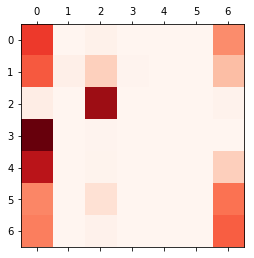

In [258]:
plt.matshow(cf(np.argmax(y_test.as_matrix(), axis = 1), np.argmax(y_pred, axis = 1)), cmap = 'Reds')
import matplotlib.pyplot as plt
plt.show()

# Testing With Signals Of the Same Body Placement

In [259]:
test_data = pd.read_csv('../pre-processing/valid-dataset/Participant_10_belt.csv')

In [260]:
## Randomly Select 
df = pd.DataFrame(test_data)
# Randomly sample 70% of your dataframe
test_data= df.sample(frac=0.1)

In [261]:
X_test = test_data.drop('label', axis = 1)
y_test = pd.get_dummies(test_data.label)

In [262]:
y_pred = rf.predict(X_test)

In [263]:
cf(np.argmax(y_test.as_matrix(), axis = 1), np.argmax(y_pred, axis = 1))

array([[405,   0, 192,   0,   0,   0, 308],
       [ 69, 846,   0,   0,   0,  17,   0],
       [ 74,   0, 491,   0,   0,   0, 290],
       [  0,   0,   0, 932,   0,   0,   0],
       [  0,   0, 921,   0,   0,   0,   0],
       [112, 564,   0,   0,   0, 169,  10],
       [ 68,   0, 569,   0,   0,   0, 263]])

In [264]:
rf.score(X_test, y_test)

0.46365079365079365

Display Confusion Matrix for all 6 classes

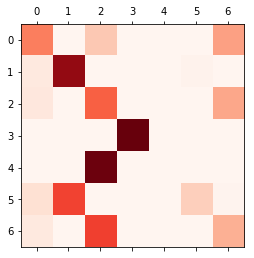

In [265]:
plt.matshow(cf(np.argmax(y_test.as_matrix(), axis = 1), np.argmax(y_pred, axis = 1)), cmap = 'Reds')
import matplotlib.pyplot as plt
plt.show()